In [18]:
import simpy
import random

class Vehicle:
    def __init__(self, sim_env, name, speed):
        self.sim_env = sim_env
        self.name = name # name of vehicle for debugging
        self.speed = speed  
        self.enter_time = None

class Intersection:
    def __init__(self, sim_env, type):
        self.sim_env = sim_env
        self.type = type # type of intersection: roundabout or traffic light
        self.vehicles = [] # list of vehicles waiting to go through intersection

    def add_vehicle(self, vehicle):
        vehicle.enter_time = self.sim_env.now
        self.vehicles.append(vehicle)
        print(vehicle.name)
        yield self.sim_env.timeout(1)  # Simulate the time it takes for a vehicle to enter the intersection  
   
class Roundabout:
    def __init__(self, sim_env, intersection):
        self.sim_env = sim_env
        self.intersection = intersection

    def process(self):
        # If there are no more vehicles going through the intersection, exit the simulation
        while True:
        # Process the addition of the first waiting vehicle
            vehicle = self.intersection.vehicles.pop(0)
            yield self.sim_env.process(self.handle_traffic())
            yield self.sim_env.process(self.intersection.add_vehicle(vehicle))
            
    def handle_traffic(self):
        # Choose a random amount of time to wait between 1 and 10 seconds to simulate a vehicle yielding to other vehicles already in the roundabout
        yield self.sim_env.timeout(random.randint(1,10)) 
        

class TrafficLight:
    def __init__(self, sim_env, intersection, toggle_length):
        self.sim_env = sim_env
        self.intersection = intersection
        self.light_color = "GREEN"
        self.toggle_length = toggle_length

    def process(self):
        while True:
            if self.sim_env.now % self.toggle_length == 0:
                if self.light_color == "GREEN":
                    self.light_color = "RED"
                else:
                    self.light_color = "GREEN"
            
            # The cars can pass through the intersection
            if self.light_color == "GREEN":
                print("our car can go!")
                yield self.sim_env.process(self.intersection.add_vehicle(vehicle))
            # Cars cannot go through the intersection, so we wait
            else:
                yield self.sim_env.timeout(self.toggle_length) 
            

            


In [19]:
# # Roundabout calculations
# roundabout_env = simpy.Environment()
# 
# # Create an intersection with roundabout control
# roundabout_intersection = Intersection(roundabout_env, type="roundabout")
# roundabout_process = roundabout_env.process(Roundabout(roundabout_env, roundabout_intersection).process())
# 
# # Create and add vehicles to the roundabout intersection
# for i in range(100):
#     # According to a quick Google search, roundabout are geometrically designed for the driver to go between 15 and 25mph.  Considering the fact that there are some Speedy Gonzales out there as well as those who don't know how to use the gas pedal, I have adjusted these speeds slightly.
#     roundabout_vehicle = Vehicle(roundabout_env, f"Roundabout-Vehicle-{i}", random.randint(10,30))
#     roundabout_intersection.vehicles.append(roundabout_vehicle)
# 
# # Run the simulation until there are no more vehicles waiting
# sim_time = 500
# roundabout_env.run(until=sim_time)
# 
# # Calculations: Total wait time, average wait time, throughput
# roundabout_total_wait_time = 0
# vehicles_not_through_intersection = 0
# 
# for vehicle in roundabout_intersection.vehicles:
#     if vehicle.enter_time:
#         print(f"{vehicle.name} entered the intersection at {vehicle.enter_time}")
#         roundabout_total_wait_time += vehicle.enter_time
#     else:
#         vehicles_not_through_intersection += 1
# 
# print(f"Roundabout Total Wait Time: {roundabout_total_wait_time} time units")
# 
# roundabout_average_wait_time = 0
# if roundabout_intersection.vehicles:
#     roundabout_average_wait_time = roundabout_total_wait_time / len(roundabout_intersection.vehicles) 
# print(f"Roundabout Average Wait Time: {roundabout_average_wait_time} time units")
# 
# roundabout_throughput = (len(roundabout_intersection.vehicles) - vehicles_not_through_intersection) / sim_time
# print(f"Roundabout Throughput: {roundabout_throughput} vehicles per unit time")

Roundabout-Vehicle-0 entered the intersection at 5
Roundabout-Vehicle-1 entered the intersection at 11
Roundabout-Vehicle-2 entered the intersection at 19
Roundabout-Vehicle-3 entered the intersection at 30
Roundabout-Vehicle-4 entered the intersection at 32
Roundabout-Vehicle-5 entered the intersection at 35
Roundabout-Vehicle-6 entered the intersection at 38
Roundabout-Vehicle-7 entered the intersection at 44
Roundabout-Vehicle-8 entered the intersection at 49
Roundabout-Vehicle-9 entered the intersection at 51
Roundabout-Vehicle-10 entered the intersection at 57
Roundabout-Vehicle-11 entered the intersection at 63
Roundabout-Vehicle-12 entered the intersection at 72
Roundabout-Vehicle-13 entered the intersection at 82
Roundabout-Vehicle-14 entered the intersection at 87
Roundabout-Vehicle-15 entered the intersection at 97
Roundabout-Vehicle-16 entered the intersection at 106
Roundabout-Vehicle-17 entered the intersection at 112
Roundabout-Vehicle-18 entered the intersection at 114
R

In [20]:
# Light calculations
light_env = simpy.Environment()

# Create an intersection with traffic light control
light_intersection = Intersection(light_env, type="traffic light")
light_process = light_env.process(TrafficLight(light_env, light_intersection, toggle_length=10).process())

# Create and add vehicles to the traffic light intersection
for i in range(100):
    # Here, we'll pretend the speed limit is 35 mph.  Because we have some very special drivers, especially in Newport News, I adjusted the range of speeds that people could be going.
    light_vehicle = Vehicle(light_env, f"Traffic-Light-Vehicle-{i}", random.randint(15,50))
    light_intersection.vehicles.append(light_vehicle)

# Run the simulation until there are no more vehicles waiting
sim_time = 500
light_env.run(until=sim_time)

# Calculations: Total wait time, average wait time, throughput
light_total_wait_time = 0
vehicles_not_through_intersection = 0

print(len(light_intersection.vehicles))
for vehicle in light_intersection.vehicles:
    if vehicle.enter_time:
        print(f"{vehicle.name} entered the intersection at {vehicle.enter_time}")
        light_total_wait_time += vehicle.enter_time
    else:
        vehicles_not_through_intersection += 1

print(f"Light Total Wait Time: {light_total_wait_time} time units")

light_average_wait_time = 0
if light_intersection.vehicles:
    light_average_wait_time = light_total_wait_time / len(light_intersection.vehicles) 
print(f"Light Average Wait Time: {light_average_wait_time} time units")

light_throughput = (len(light_intersection.vehicles) - vehicles_not_through_intersection) / sim_time
print(f"Light Throughput: {light_throughput} vehicles per unit time")

Traffic-Light-Vehicle-50 entered the intersection at 310
Traffic-Light-Vehicle-51 entered the intersection at 311
Traffic-Light-Vehicle-52 entered the intersection at 312
Traffic-Light-Vehicle-53 entered the intersection at 313
Traffic-Light-Vehicle-54 entered the intersection at 314
Traffic-Light-Vehicle-55 entered the intersection at 315
Traffic-Light-Vehicle-56 entered the intersection at 316
Traffic-Light-Vehicle-57 entered the intersection at 317
Traffic-Light-Vehicle-58 entered the intersection at 318
Traffic-Light-Vehicle-59 entered the intersection at 319
Traffic-Light-Vehicle-60 entered the intersection at 330
Traffic-Light-Vehicle-61 entered the intersection at 331
Traffic-Light-Vehicle-62 entered the intersection at 332
Traffic-Light-Vehicle-63 entered the intersection at 333
Traffic-Light-Vehicle-64 entered the intersection at 334
Traffic-Light-Vehicle-65 entered the intersection at 335
Traffic-Light-Vehicle-66 entered the intersection at 336
Traffic-Light-Vehicle-67 entere

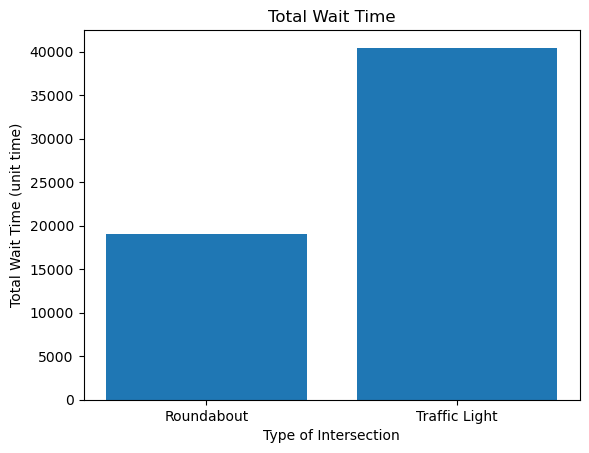

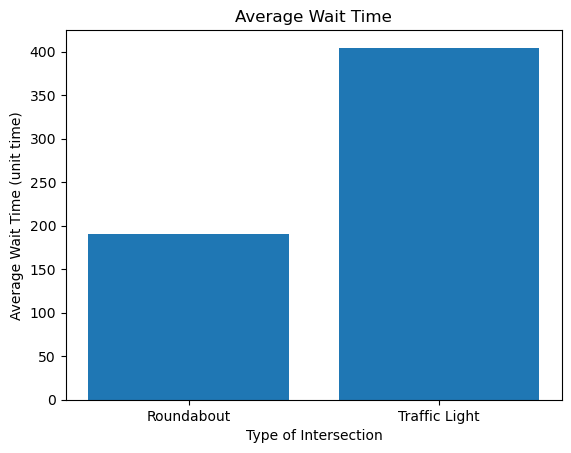

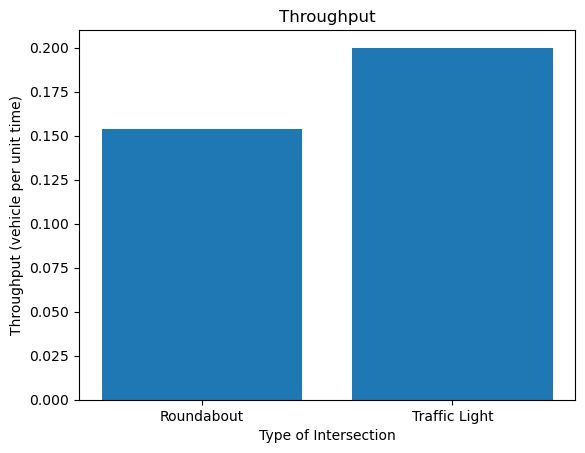